# Les génériques

## Avant les génériques…

Avant l’implémentation des génériques (en .NET 2.0), plusieurs objets à utilité « générique » utilisaient le type de base « `object` » afin de simuler une utilisation générique.

- Toutes collections dans l’espace de nom « `System.Collections` » sont des exemples d’objet à utilité « générique » utilisant le type de base « `object` ».
- Ces objets sont donc seulement partiellement fortement typé.

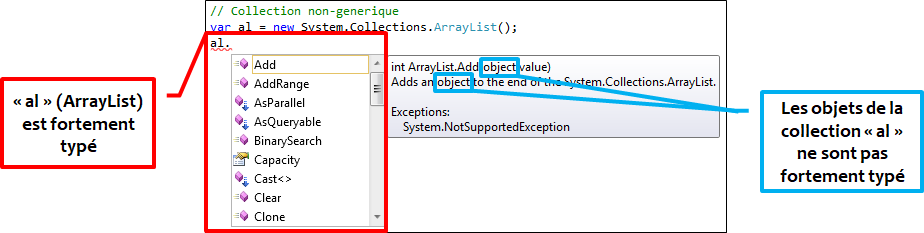


Si un objet est représenté en tant que « `object` » (dont pas fortement typé), on ne peut pas accéder à ses membres.

- En prenant encore une collection de « `System.Collections` », on voit qu’en sélectionnant un item, on n’a pas accès au membre de la classe « `Personne` »

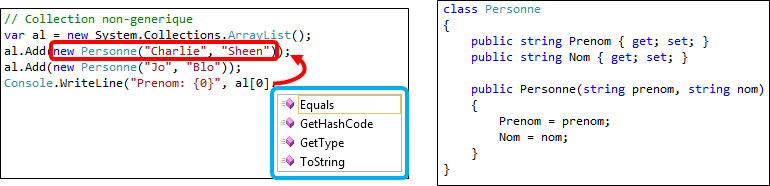

De plus, en utilisant le type de base « `object` », on perd toute sécurité de type
C’est-à-dire que tous les types d’objet sont acceptés

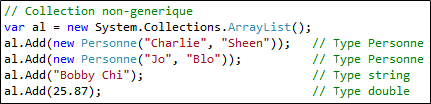

In [6]:
var al = new System.Collections.ArrayList();

al.Add(new Personne("Alice", 12)); // Personne
al.Add("Bonjour le monde");        // string
al.Add(25.87);                     // double

foreach(var item in al)
{
    if (item is Personne p)
    {
        Console.WriteLine($"Nom: {p.Nom}\tAge: {p.Age}");
    }
    else if (item is string s)
    {
        Console.WriteLine(s.ToUpper());
    }
    else if (item is double d)
    {
        Console.WriteLine($"{d} + 1.0 = {d + 1}");
    }
}

// Déclaration du type personne
public record Personne(string Nom, int Age);

Nom: Alice	Age: 12
BONJOUR LE MONDE
25.87 + 1.0 = 26.87


## Depuis les génériques…

Depuis .NET 2.0, on peut maintenant utiliser les « génériques » afin d’implémenter des types à utilité générique tout en gardant la sécurité de type et ayant une implémentation complètement fortement typé.

- Toutes collections dans l’espace de nom « `System.Collections.Generic` » sont des exemples d’objet à utilité « générique » utilisant la notion de générique

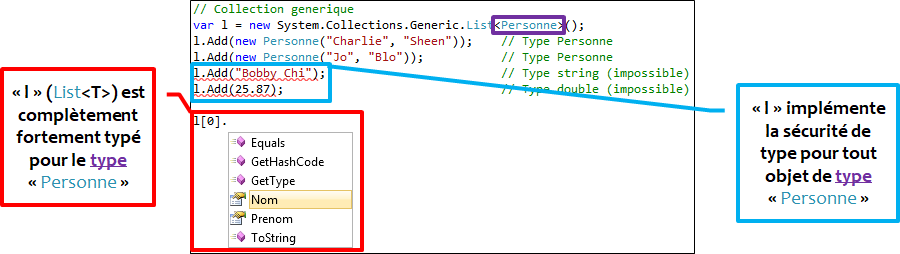

## Les paramètres de type générique

En .NET, seulement les classes (records), structures, interfaces et délégués peuvent être définis de manière générique.

### Classes, structures et interfaces génériques

Un objet défini de manière générique peut être identifié à l’aide du ou des paramètres de type générique.

- Ces paramètres, suivant le nom du type, sont encadrés entre des chevrons/crochets obliques (`<` `>`) et séparés par des virgules.
- Chaque paramètre commence habituellement par un T majuscule (vous devriez toujours suivre cette convention d’écriture).

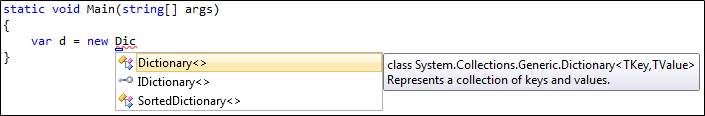

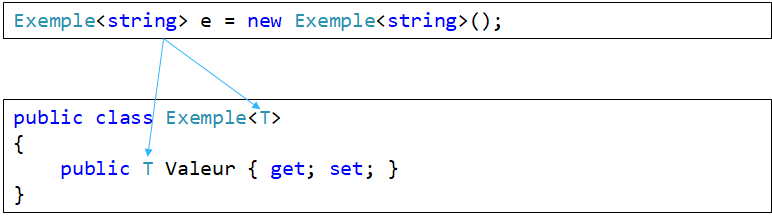

In [26]:
public class Exemple<T>
{
    public T Valeur { get; set; }
}

Exemple<int> eInt = new Exemple<int>();
eInt.Valeur = 100;
Console.WriteLine(eInt.Valeur);

var eString = new Exemple<string>();
eString.Valeur = "Bonjour le monde";
Console.WriteLine(eString.Valeur.ToUpper());

var e = new Exemple<double>() { Valeur = 200.01 };
//e.Valeur = "Erreur"; // error CS0029: Cannot implicitly convert type 'string' to 'double'

100
BONJOUR LE MONDE


In [24]:
public class Operation<T>
{
    public bool EstReussie { get; set; } // true si l'operation est réussie; sinon, false.
    public T Valeur { get; set; }
}

Les paramètres de type générique doivent être spécifiés à l’initialisation et habituellement aussi à la déclaration d’une variable.

- Les paramètres doivent être définis entre chevrons suivant le nom du type et séparés par des virgules.

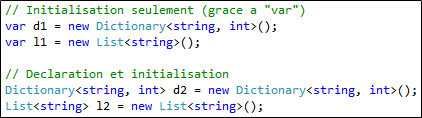

In [ ]:
public class KeyValuePair<TKey, TValue>
{
    public TKey Key { get; set; }
    public TValue Value { get; set; }
}

Afin de comprendre l’utilisation de générique pour un type quelconque, il suffit de l’expliquer verbalement suivant les syntaxes suivantes :

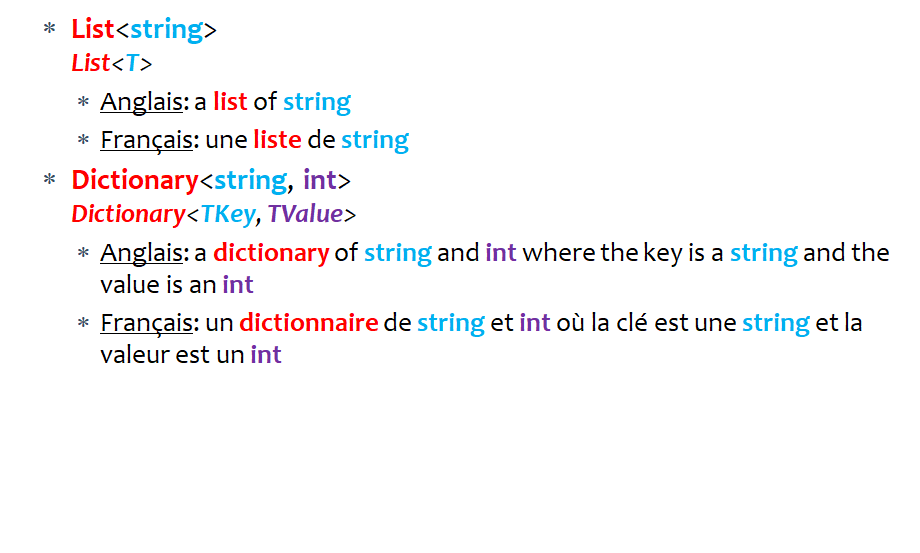

Tous les paramètres de type générique peuvent être utilisés à l’intérieur de la définition d’un type.

Prenons par exemple une classe non générique servant de liste de string (`ListeDeString`) et une autre classe, mais celle-ci étant générique servant de liste de **T** (`Liste`<**T**>) où **T** est le type générique.

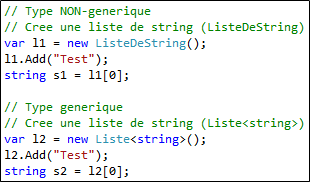

La classe `Liste<T>` peut utiliser « `T` » comme type (pouvant représenter n’importe quoi) avec la définition de ses membres.
    
- Cette liste peut donc représenter une liste fortement typé de n’importe quel objet en .NET.
    
La classe `ListeDeString` doit utiliser « `string` » comme type avec la définition de ses membres.
- Cette liste représente donc une liste fortement typé de string seulement


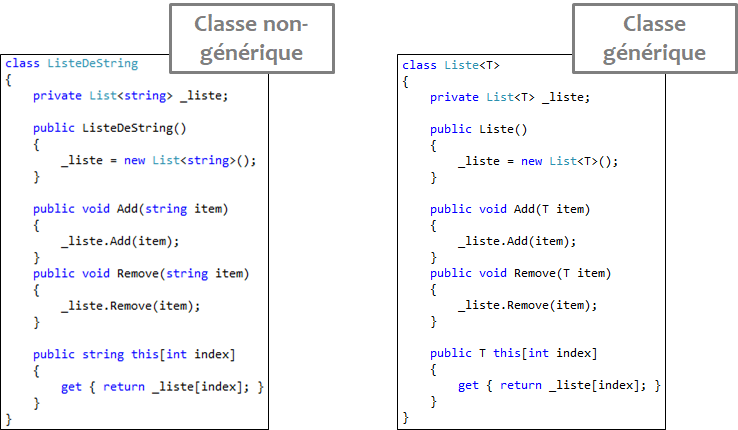

## Membres génériques

Une classe non-générique peut contenir des membres (méthodes et/ou propriétés) génériques.

- Les paramètres de type générique doivent être définis entre chevrons après le nom de la méthode et séparés par des virgules (tout comme avec une classe générique)

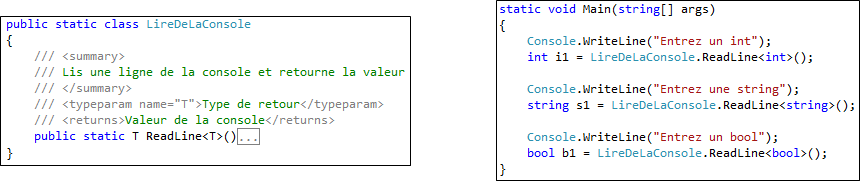

Lorsque vous utilisez les paramètres de type générique, ceux-ci comprennent seulement les membres de base de « `object` » (puisqu’il peut représenter n’importe quoi, les membres ne sont pas connus).

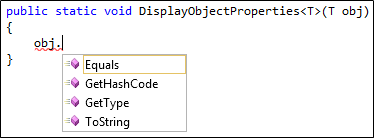

Une autre limitation est qu’on ne peut pas créer une instance de « `T` » avec le constructeur par défaut, car ce ne sont pas tous les objets qui implémentent un constructeur par défaut.

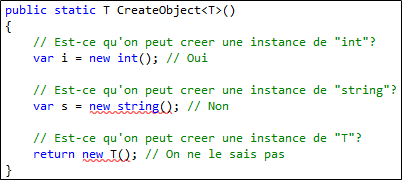

## Contraindre les paramètres de type

Afin de résoudre ces limitations, on peut ajouter des contraintes sur le type générique spécifié à l’aide du mot clé « `where` ».

La contrainte est constituée de :
- Mot clé « `where` » (suivant la signature du membre/type)
- Le type générique
- Deux points (`:`)
- Les contraintes séparées par des virgules

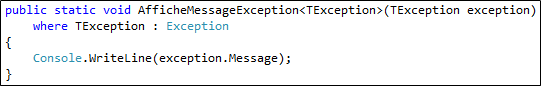

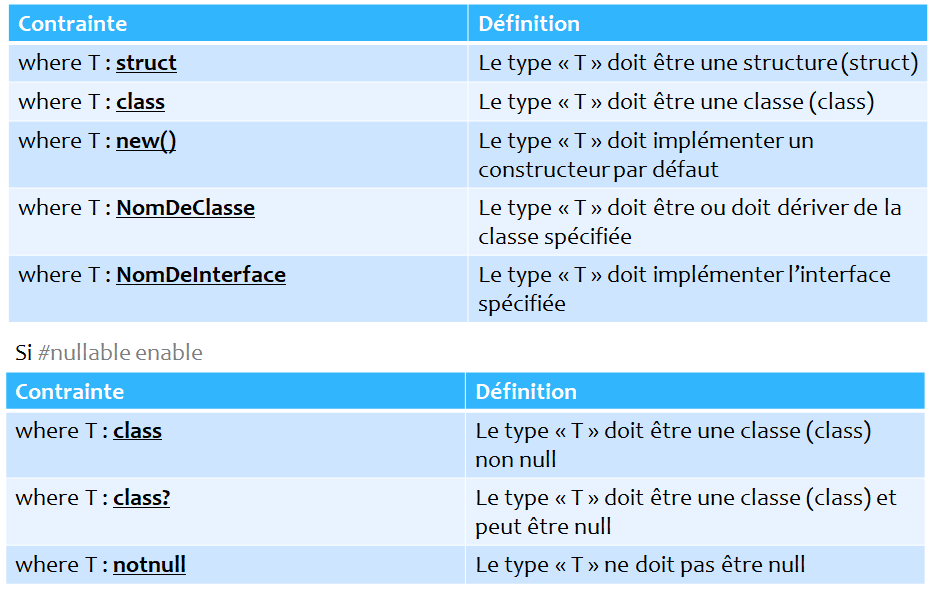

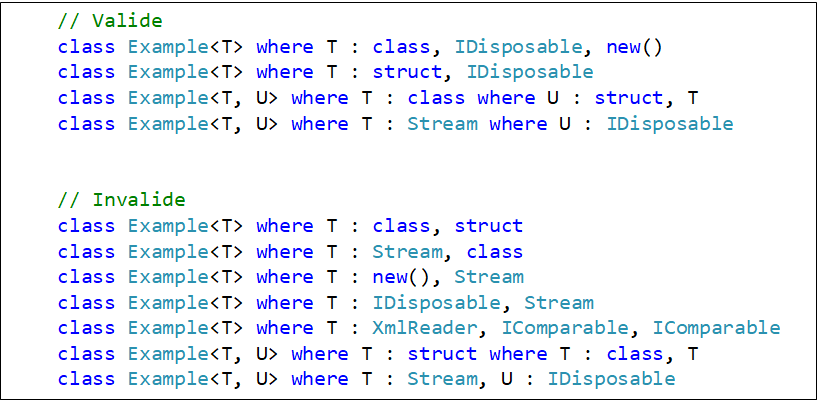

## Inférence de types

Il est possible d’appeler une méthode sans qu'ils soient indiqués explicitement dans le code source.

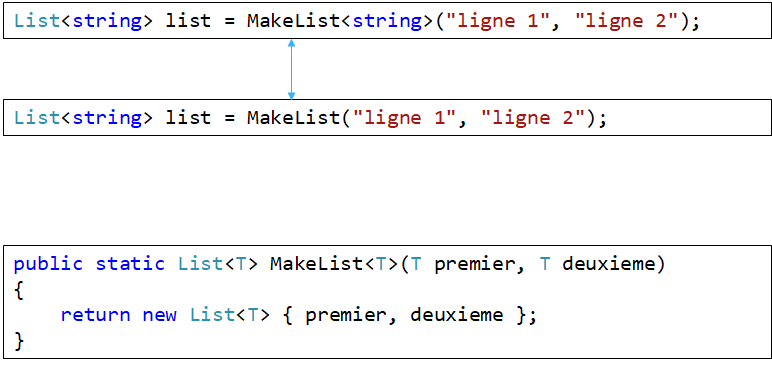